In [39]:
!pip3  install pandas understatapi matplotlib mplsoccer seaborn scipy --quiet --no-deps

In [40]:
import pandas as pd
import understatapi
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch


In [41]:
client = understatapi.UnderstatClient()

In [42]:
shot_data = client.match(match="26660").get_shot_data()
tot_shots = shot_data['a']

In [43]:
df = pd.DataFrame(tot_shots)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [44]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,594789,2,Goal,96.900002,46.900002,0.8900972008705139,Brennan Johnson,a,10760,OpenPlay,2024,RightFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,Micky van de Ven,Pass
1,594790,10,SavedShot,93.099998,62.599998,0.36631518602371216,James Maddison,a,6818,OpenPlay,2024,LeftFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,Dejan Kulusevski,Pass
2,594791,11,MissedShots,88.099998,66.199997,0.08490917831659317,Iyenoma Destiny Udogie,a,8831,OpenPlay,2024,LeftFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,Dejan Kulusevski,Pass
3,594792,19,ShotOnPost,88.500000,31.200001,0.07164718955755234,Brennan Johnson,a,10760,OpenPlay,2024,RightFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,Dejan Kulusevski,Pass
4,594795,29,SavedShot,77.699997,48.099998,0.04637486860156059,James Maddison,a,6818,OpenPlay,2024,RightFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,Dejan Kulusevski,BallRecovery


In [45]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].astype(float).sum()
xG_per_shot = total_xG / total_shots

points_avg_dist = df['X'].mean()
actual_avg_dist = 120 - (df['X'].astype(float) * 1.2).mean()
print(points_avg_dist, actual_avg_dist)

87.57500012715657 14.90999984741211


In [46]:
actual_avg_dist

np.float64(14.90999984741211)

In [47]:
background_color='#0C0D0E'


pitch = VerticalPitch(
    pitch_type = 'opta',
    half = True,
    pitch_color = background_color,
    pad_bottom=.5,
    line_color = 'white',
    linewidth=.75,
    axis=True, label=True
)
    

In [50]:
print(df['xG'].dtypes)  # Check the data type of the column
print(df['xG'].isnull().sum())  # Check for missing values


object
0


Text(0.63, 0, '0.23')

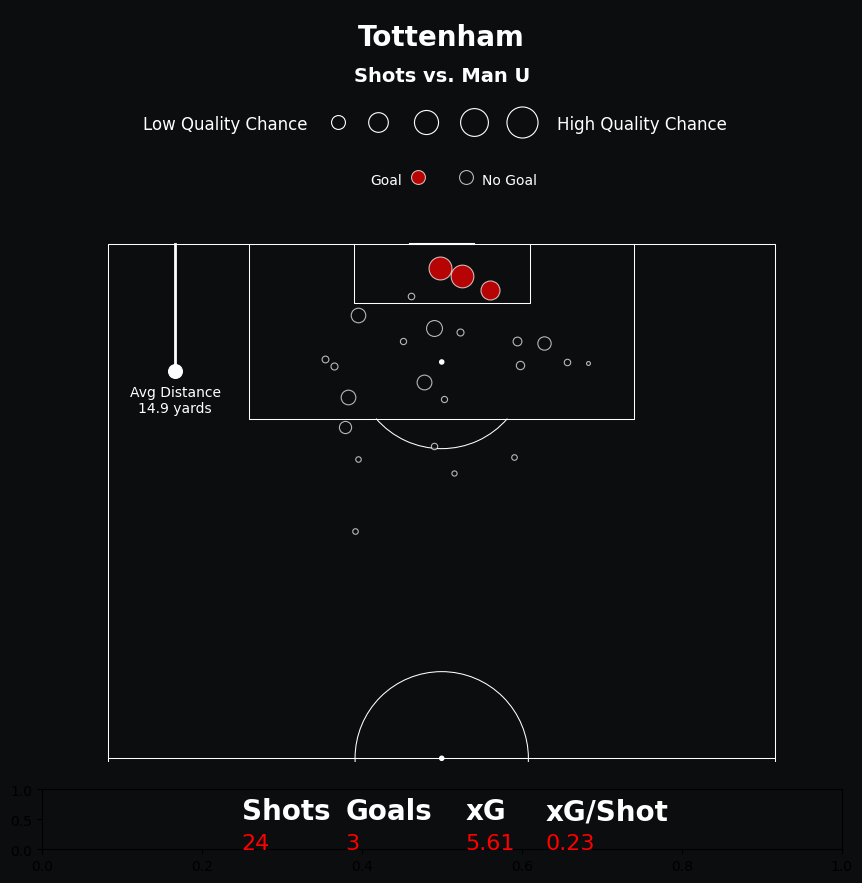

In [54]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x=.5,
    y=.85,
    s=f'Tottenham',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=.5,
    y=.7,
    s=f'Shots vs. Man U',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=.23,
    y=.5,
    s=f'Low Quality Chance',
    fontsize = 12,
    color = 'white',
    ha = 'center'
)
# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    color='white', 
    ha='center'
)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)

ax1.scatter(
    x=.47,
    y=.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)

ax1.scatter(
    x=.53,
    y=.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)

ax1.text(
    x=0.55, 
    y=.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

ax2.scatter(
    x=90,
    y=points_avg_dist,
    s=100,
    color='white',
    linewidth = .8
)
ax2.plot(
    [90,90],
    [100,points_avg_dist],
    color='white',
    linewidth=2
)
ax2.text(
    x=90,
    y= points_avg_dist - 4,
    s=f'Avg Distance\n{actual_avg_dist:.1f} yards',
    fontsize=10,
    color = 'white',
    ha='center'
)

for x in df.to_dict(orient='records'):
    df['xG'] = pd.to_numeric(df['xG'], errors='coerce').fillna(0)
    pitch.scatter(
        x['X'],
        x['Y'],
        s= 300 * x['xG'],
        color = 'red' if x['result'] == 'Goal' else background_color,
        ax = ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontweight = 'bold',
    color= 'white',
    ha='left'
)

ax3.text(
    x=.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    color= 'red',
    ha='left'
)

ax3.text(
    x=.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontweight = 'bold',
    color= 'white',
    ha='left'
)

ax3.text(
    x=.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    color= 'red',
    ha='left'
)

ax3.text(
    x=.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontweight = 'bold',
    color= 'white',
    ha='left'
)

ax3.text(
    x=.53,
    y=0,
    s=f'{round(total_xG, 2):.2f}',
    fontsize=16,
    color= 'red',
    ha='left'
)

ax3.text(
    x=.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontweight = 'bold',
    color= 'white',
    ha='left'
)

ax3.text(
    x=.63,
    y=0,
    s=f'{round(xG_per_shot, 2):.2f}',
    fontsize=16,
    color= 'red',
    ha='left'
)



In [57]:
fig.savefig('/Users/cmeraz/CS_Projects/spursy/graphics/TottVsManU.png', facecolor=background_color, bbox_inches='tight')
